# Fraud Detection with Isolation Forest and LOF 
Project from Eduonix Learning Solutions: 
[Build A Complete Project In Machine Learning | Credit Card Fraud Detection 2019 | Eduonix](https://www.youtube.com/watch?v=gCWBFyFTxVU&list=TLPQMjIwMzIwMjGI8nKrit4spA&index=2)

### A Note on this Project
The models used in this example are unsupervised algorithms meant to detect outliers in the data. This is more of an exercise in utilizing these unsupervised algorithms with some real-world data to see how well these "off-the-shelf" algorithms can quickly identify our data's fraudulent outliers. Generally, these algorithms do not require extensive preprocessing prior to application.

### Measuring Success
For this exercise, the most important factor for our success is the **false negative rate**. In this case, the false negative rate **refers to the number of fraudulent cases that go undetected by our model**. We would prefer to have false positive errors over false negative errors for this particular problem. A bias in favor of a better false negative rate with a worse false positive rate is a better tradeoff for our fraud detection algorithm. The best measures of the false negative rate are the **Recall & F1-Score** so we should pay close attention to these two metrics.

In [1]:
import sys
import numpy as np
import pandas
import matplotlib
import seaborn as sns
import scipy
import sklearn

In [2]:
print(f'Python: {sys.version}')
print(f'Numpy: {np.version}')
print(f'Pandas: {pandas.__version__}')
print(f'Matplotlib: {matplotlib.__version__}')
print(f'Seaborn: {sns.__version__}')
print(f'Scipy: {scipy.__version__}')
print(f'Sklearn: {sklearn.__version__}')

Python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Numpy: <module 'numpy.version' from 'C:\\Users\\ajgal\\AppData\\Roaming\\Python\\Python38\\site-packages\\numpy\\version.py'>
Pandas: 1.2.4
Matplotlib: 3.3.4
Seaborn: 0.11.1
Scipy: 1.6.2
Sklearn: 0.24.2


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Load the dataset from the csv file using pandas

In [4]:
data = pd.read_csv('data/creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Explore the dataset
This dataset was created by having the original dataset having a PCA dimensionality reduction on the dataset to remove identifying attributes from the dataset to protect the id's of the credit card holders

In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
data.shape

(284807, 31)

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
data['Class'].describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [10]:
# Determine number of fraud cases in dataset
Fraud =  data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

fraud_to_valid_ratio = len(Fraud) / float(len(Valid))

print(f'Fraud Cases: {len(Fraud)}')
print(f'Valid Cases: {len(Valid)}')
print(f'Ratio of Fraud to Valid Cases: {fraud_to_valid_ratio}')

Fraud Cases: 492
Valid Cases: 284315
Ratio of Fraud to Valid Cases: 0.0017304750013189597


## Using a Sample for Modeling

In [11]:
data_sample = data.sample(frac=0.15,
                  random_state=42)
data_sample.shape

(42721, 31)

In [12]:
# Determine number of fraud cases in dataset
Fraud =  data_sample[data_sample['Class'] == 1]
Valid = data_sample[data_sample['Class'] == 0]

fraud_to_valid_ratio = len(Fraud) / float(len(Valid))

print(f'Fraud Cases: {len(Fraud)}')
print(f'Valid Cases: {len(Valid)}')
print(f'Ratio of Fraud to Valid Cases: {fraud_to_valid_ratio}')

Fraud Cases: 74
Valid Cases: 42647
Ratio of Fraud to Valid Cases: 0.001735174807137665


<AxesSubplot:>

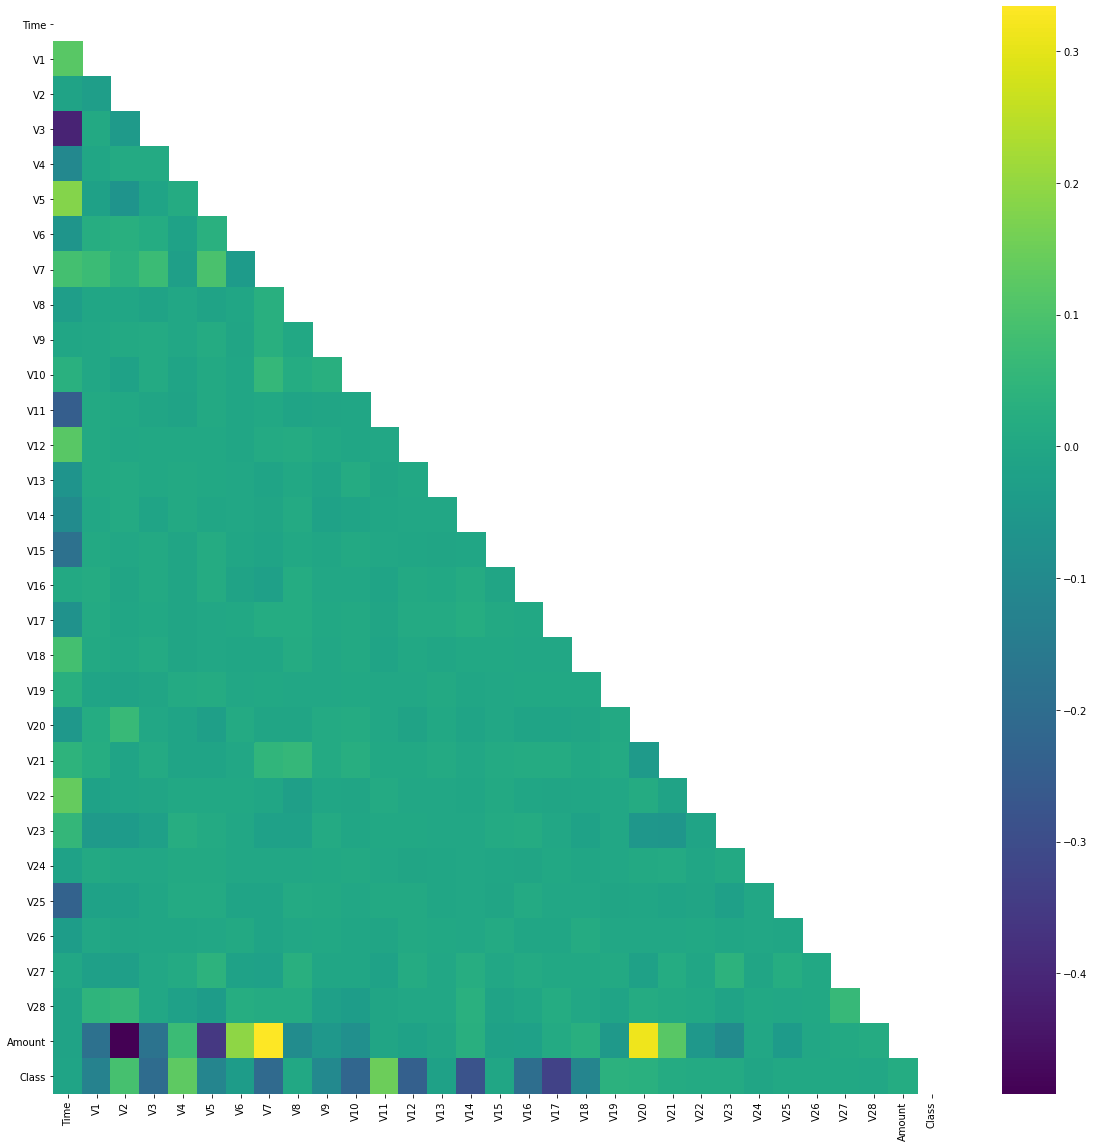

In [13]:
# Correlation matrix heatmap
corr = data_sample.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(figsize=(20,20))
sns.heatmap(corr, mask=mask, cmap='viridis')

At a glance we can see that V2, V4, V11, and V17 seem to indicate some kind of relationship with the class determination. Nothing too much to go on at the moment but some food-for-thought...

### Preparing data for Unsupervised Learning

In [14]:
X = data_sample.drop(['Class'],axis=1)
y = data_sample['Class']

print(X.shape)
print(y.shape)

(42721, 30)
(42721,)


### Modeling with Isolation Trees & Local Outlier Factor
> SVM models are also common in anomaly detection but they are computationally expensive by comparison

In [15]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [16]:
# Define a random state
rand_state = 42
outlier_fraction = fraud_to_valid_ratio

# Define the outlier detection methods
classifiers = {
    'Isolation Forest': IsolationForest(max_samples=len(X),
                                       contamination= outlier_fraction,
                                       random_state=rand_state),
    'Local Outlier Factor':LocalOutlierFactor(n_neighbors=20,
                                             contamination=outlier_fraction,)
}

## Precision, Recall, Accuracy, & F1-Scores
It can be difficult to remember the differences between each of these metrics so for reference please see note the following:

##  Precision
>The measure of true positives out of all positive classifications.

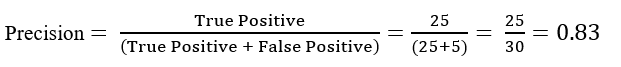

##  Recall
>The measure of true positives out of all actual positive cases.

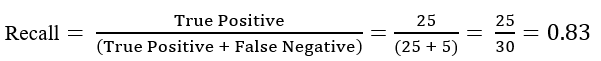

## Accuracy
>The measure of all true cases out of all cases.

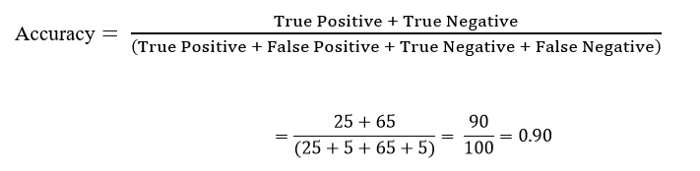


##  F1-Score
>* The harmonic mean of Precision and Recall to better gauge incorrectly classified cases overall
>* The harmonic mean is used to balance the weights of all data points when generating a mean value. It removes the imbalance created by outliers either contributing too much to the mean calculation or too little.

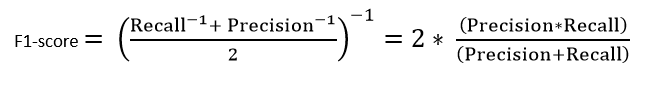

For more on these concepts see [Accuracy vs. F1-Score](https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2) on Medium

In [17]:
# Fit the model
n_outliers = len(Fraud)
target_names=['Valid', 'Fraud']

for i, (clf_name,clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud
    y_pred[y_pred==1] = 0
    y_pred[y_pred==-1] = 1
    
    n_errors = (y_pred != y).sum()
    
    # Run classification metrics
    print(f'Number of Errors for {clf_name}: {n_errors}')
    print(f'Accuracy Score for {clf_name}: {accuracy_score(y,y_pred)}','\n')
    print(classification_report(y,y_pred, target_names=target_names), '\n')

Number of Errors for Isolation Forest: 105
Accuracy Score for Isolation Forest: 0.997542192364411 

              precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     42647
       Fraud       0.29      0.30      0.30        74

    accuracy                           1.00     42721
   macro avg       0.65      0.65      0.65     42721
weighted avg       1.00      1.00      1.00     42721
 

Number of Errors for Local Outlier Factor: 147
Accuracy Score for Local Outlier Factor: 0.9965590693101753 

              precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     42647
       Fraud       0.01      0.01      0.01        74

    accuracy                           1.00     42721
   macro avg       0.51      0.51      0.51     42721
weighted avg       1.00      1.00      1.00     42721
 



## Analyzing the Results

For our two algorithms we can see that our recall and f1-scores are not too promising. Neither algorithm seems to track fraud as well as we may had hoped.

### Isolation Forest
Our Isolation Forest has a recall of just 0.30 which essentially states that for our data we will only classify 30% of cases as fraudulent with the rest being misclassified (meaning 70% of cases would have gone undetected).

### Local Outlier Factor
LOF performed far worse than the isolation forest only managing to classify 1% of cases as fraudulent with 99% going undetected.

# Conclusion
Based on these results overall, we can see that an unsupervised approach without serious modifications would be unadvisable. There is a chance that by utilizing labels to train a supervised model we can achieve much better results in catching fraudulent cases.